In [13]:
!jupyter nbextension enable --py widgetsnbextension

Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [12]:
import tqdm
output = []
for i in tqdm.tqdm(range(1000000000)):
    output.append(i)

  2%|▏         | 20111980/1000000000 [00:05<04:23, 3711908.92it/s]


KeyboardInterrupt: 

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
import re
import pickle
import tqdm

In [4]:
df=pd.read_excel("text-summarization.xlsx")
df.head()

,Text,Summary
0,"আমি জানি আমার এই লেখা,টির জন্য আমাকে অনেক গালম...",বাংলাদেশে কোচিং বানিজ্য বন্ধ এখন সময়ের দাবি
1,একটা ভাষায় তুলনামূলক ভাবে অনেক বেশি মানুষ কথা ...,বাংলা ভাষার প্রযুক্তি নিয়ে আমাদের আরো অনেক বেশ...
2,আমাদের ফেব্রুয়ারি মাসটি ভাষার মাস। এর বাইরেও ত...,যদি শিশুরা বই পড়ার অভ্যাস করে তাহলে সারা জীবনে...
3,আমাকে যদি কেউ কখনো জিজ্ঞেস করে বাংলাদেশের সবচে...,বাংলাদেশে সব স্তরে নারীর ক্ষমতায়নের জন্য আরও অ...
4,মানুষের মুখ খুব শক্তিশালী এক জিনিস। মানুষ যেটা...,"ভালো কথা বল, নয়ত চুপ থাকো"


In [5]:
document = df['Text']
summary = df['Summary']

In [6]:
document[30], summary[30]

('"গতরাতে আব্বু তার ফোন নিয়ে আমার কাছে এসে বললো, "বাবা, ফেইসবুকে কোন একটা পোস্টে কিভাবে প্রাইভেসি সেট করে, একটু দেখায় দেও তো"আমি তাকে একবার দেখালাম প্রসেসটা ... কিন্তু বয়সের কারণে খালি চোখে আব্বু ডান পাশের ছোট ডট দেখতে পাচ্ছিলো না ... বারবার বলতেছিলো, "কই? কই ক্লিক করবো?"প্রায় ৫ বার দেখানোর পরেও যখন আব্বু উল্টাপাল্টা ক্লিক করতেসিলো, প্রচণ্ড মেজাজ খারাপ হইলো ... আমি বেখেয়ালে একটু রাগের সুরে বললাম, "এই সিম্পল জিনিস পারতেছো না? ধুরর"এই কথাটা বলার সাথে সাথে আব্বুর মুখটা শুকনা হয়ে গেলো ... আমি সাথে সাথে বুঝতে পারলাম, মানুষটাকে আমি ছোট্ট একটা কথা দিয়ে অনেক বড় একটা কষ্ট দিয়ে ফেলসি ... \'সরি\' বলে আবার ভালোভাবে প্রসেসটা বুঝায় বললাম !!আমার ধারণা, নিজের অজান্তেই খুব ছোট ছোট কথা দিয়ে আমরা মানুষকে আঘাত করে ফেলি ... পৃথিবীতে সবাই সবকিছু পারে না ... কারো না পারা নিয়ে তার সাথে অপমানের সুরে কথা বললে সে নিজের ভেতর খুব ছোট বোধ করে ... আমার কোন অধিকার নেই কাউকে অপমান করার, কাউকে ছোট করার !!যে বাবার প্রতি আমি বিরক্ত হলাম কারণ সে সামান্য ফোন চালাতে পারছে না, সেই বাবাই ছোট বেলায় কখনো বিরক্ত হয়

In [7]:
len(df['Text'])

1026

In [8]:
c1 = dict(df.Text.str.split(expand=True).stack().value_counts())
c1 = dict(sorted(c1.items(), key=lambda x: x[1], reverse=True))
c2 = dict(df.Summary.str.split(expand=True).stack().value_counts())
c2 = dict(sorted(c2.items(), key=lambda x: x[1], reverse=True))

In [9]:
c2

{'না': 154,
 'মানুষ': 70,
 'জন্য': 63,
 'করে': 62,
 'ভালোবাসা': 62,
 'না।': 56,
 'অনেক': 54,
 'করা': 48,
 'মানুষের': 45,
 'করতে': 45,
 'আর': 45,
 'হবে': 44,
 'সব': 43,
 'ভালো': 42,
 'হয়': 39,
 'কিছু': 39,
 'যে': 38,
 'সাথে': 34,
 'এই': 33,
 'কষ্ট': 32,
 'এর': 32,
 'থেকে': 32,
 'নিজের': 32,
 'ভালোবাসার': 32,
 'কোনো': 31,
 'সময়': 30,
 'ও': 30,
 'করার': 28,
 'কথা': 28,
 'হতে': 28,
 'যায়': 28,
 ',': 28,
 'তার': 26,
 'নেই': 26,
 'একটি': 25,
 'উচিত': 25,
 'থাকে': 25,
 'হয়ে': 24,
 'আমাদের': 24,
 'কেউ': 24,
 'কারো': 24,
 'প্রতি': 24,
 'পারে': 23,
 'প্রেম': 21,
 '।': 21,
 'আমরা': 21,
 'মানুষকে': 21,
 'উপর': 20,
 'একজন': 20,
 'যায়।': 20,
 'জীবন': 20,
 'এক': 20,
 'হবে।': 19,
 'হয়।': 19,
 'নিজেকে': 19,
 'কাউকে': 19,
 'মন': 19,
 'থাকা': 18,
 'একটা': 18,
 'কখনো': 18,
 'তাকে': 18,
 'এবং': 18,
 'নিয়ে': 18,
 'এখন': 18,
 'করোনা': 17,
 'এমন': 17,
 'তা': 16,
 'চলে': 16,
 'সে': 16,
 'জীবনে': 16,
 'মধ্যে': 16,
 'মতো': 16,
 'শুধু': 15,
 'যাবে': 15,
 'সবার': 15,
 'হচ্ছে': 15,
 'মানে': 15,
 'গুলো': 15,


In [10]:
d1 = pd.DataFrame(c1.items(), columns=['Words', 'Count'])
d1 = d1.head(20)
d1

,Words,Count
0,না,1532
1,করে,1516
2,আমার,1143
3,আর,1107
4,আমি,1105
5,এই,922
6,তার,879
7,না।,770
8,একটা,765
9,যে,753


In [11]:
d2 = pd.DataFrame(c2.items(), columns=['Words', 'Count'])
d2 = d2.head(20)
d2

,Words,Count
0,না,154
1,মানুষ,70
2,জন্য,63
3,করে,62
4,ভালোবাসা,62
5,না।,56
6,অনেক,54
7,করা,48
8,মানুষের,45
9,করতে,45


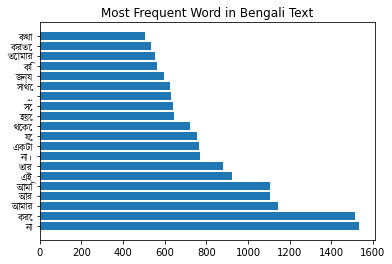

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
prop = fm.FontProperties(fname='kalpurush.ttf')
plt.barh(d1.Words,d1.Count)
plt.yticks(d1.Words,fontproperties=prop)
plt.title('Most Frequent Word in Bengali Text')
plt.show()

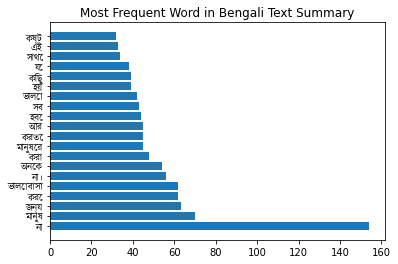

In [13]:
plt.barh(d2.Words,d2.Count)
plt.yticks(d2.Words,fontproperties=prop)
plt.title('Most Frequent Word in Bengali Text Summary')
plt.show()

In [14]:
summary = summary.apply(lambda x: '<go> ' + str(x) + ' <stop>')
summary.head()

0    <go> বাংলাদেশে কোচিং বানিজ্য বন্ধ এখন সময়ের দা...
1    <go> বাংলা ভাষার প্রযুক্তি নিয়ে আমাদের আরো অনে...
2    <go> যদি শিশুরা বই পড়ার অভ্যাস করে তাহলে সারা ...
3    <go> বাংলাদেশে সব স্তরে নারীর ক্ষমতায়নের জন্য ...
4                <go> ভালো কথা বল, নয়ত চুপ থাকো <stop>
Name: Summary, dtype: object

In [15]:
# since < and > from default tokens cannot be removed
filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
oov_token = '<unk>'

In [16]:
document_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token=oov_token)
summary_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=filters, oov_token=oov_token)

In [17]:
document_tokenizer.fit_on_texts(document)
summary_tokenizer.fit_on_texts(summary)

In [18]:
inputs = document_tokenizer.texts_to_sequences(document)
targets = summary_tokenizer.texts_to_sequences(summary)

In [19]:
summary_tokenizer.texts_to_sequences(["বাংলাদেশে কোচিং বানিজ্য বন্ধ এখন সময়ের দাবি"])

[[153, 547, 942, 379, 61, 2199, 548]]

In [20]:
summary_tokenizer.sequences_to_texts([[153, 547, 942, 379, 61, 134, 548]])

['বাংলাদেশে কোচিং বানিজ্য বন্ধ এখন সময়ের দাবি']

In [21]:
encoder_vocab_size = len(document_tokenizer.word_index) + 1
decoder_vocab_size = len(summary_tokenizer.word_index) + 1

encoder_vocab_size, decoder_vocab_size

(23995, 2814)

In [22]:
document_lengths = pd.Series([len(x) for x in document])
summary_lengths = pd.Series([len(x) for x in summary])

In [23]:
document_lengths.describe()

count    1026.000000
mean      814.735867
std       893.202858
min        42.000000
25%       257.500000
50%       524.000000
75%      1029.250000
max      8262.000000
dtype: float64

In [24]:
summary_lengths.describe()

count    1026.000000
mean       54.670565
std        23.110480
min        15.000000
25%        41.000000
50%        51.000000
75%        63.000000
max       462.000000
dtype: float64

In [25]:
encoder_maxlen = 250
decoder_maxlen = 75

In [26]:
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=encoder_maxlen, padding='post', truncating='post')
targets = tf.keras.preprocessing.sequence.pad_sequences(targets, maxlen=decoder_maxlen, padding='post', truncating='post')

In [27]:
inputs = tf.cast(inputs, dtype=tf.int32)
targets = tf.cast(targets, dtype=tf.int32)

2022-12-01 16:49:52.890894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-01 16:49:55.581819: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15401 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:04:00.0, compute capability: 6.0


In [28]:
BUFFER_SIZE = 2000
BATCH_SIZE = 8

In [29]:
dataset = tf.data.Dataset.from_tensor_slices((inputs, targets)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [30]:
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

In [31]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

In [32]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [33]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [34]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)
    return output, attention_weights

In [35]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)
            
        return output, attention_weights

In [36]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

In [37]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
    
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

In [38]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

In [39]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x

In [40]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
        return x, attention_weights

In [41]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)

        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

In [42]:
# hyper-params
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
EPOCHS = 70

In [43]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [44]:
learning_rate = CustomSchedule(d_model)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [45]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [46]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [47]:
train_loss = tf.keras.metrics.Mean(name='train_loss')

In [48]:
transformer = Transformer(
    num_layers, 
    d_model, 
    num_heads, 
    dff,
    encoder_vocab_size, 
    decoder_vocab_size, 
    pe_input=encoder_vocab_size, 
    pe_target=decoder_vocab_size,
)

In [49]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
    return enc_padding_mask, combined_mask, dec_padding_mask

In [50]:
checkpoint_path = "checkpoints"
ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

In [51]:
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp, 
            True, 
            enc_padding_mask, 
            combined_mask, 
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)

In [52]:
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
  
    for (batch, (inp, tar)) in enumerate(dataset):
        train_step(inp, tar)
    
        # 55k samples
        # we display 3 batch results -- 0th, middle and last one (approx)
        # 55k / 64 ~ 858; 858 / 2 = 429
        if batch % 8 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1, batch, train_loss.result()))
      
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    
    print ('Epoch {} Loss {:.4f}'.format(epoch + 1, train_loss.result()))

    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 7.9639
Epoch 1 Batch 8 Loss 8.0156
Epoch 1 Batch 16 Loss 8.0121
Epoch 1 Batch 24 Loss 7.9973
Epoch 1 Batch 32 Loss 7.9767
Epoch 1 Batch 40 Loss 7.9560
Epoch 1 Batch 48 Loss 7.9348
Epoch 1 Batch 56 Loss 7.9146
Epoch 1 Batch 64 Loss 7.8953
Epoch 1 Batch 72 Loss 7.8716
Epoch 1 Batch 80 Loss 7.8506
Epoch 1 Batch 88 Loss 7.8364
Epoch 1 Batch 96 Loss 7.8189
Epoch 1 Batch 104 Loss 7.8036
Epoch 1 Batch 112 Loss 7.7889
Epoch 1 Batch 120 Loss 7.7770
Epoch 1 Batch 128 Loss 7.7659
Epoch 1 Loss 7.7659
Time taken for 1 epoch: 19.33117413520813 secs

Epoch 2 Batch 0 Loss 7.4778
Epoch 2 Batch 8 Loss 7.4988
Epoch 2 Batch 16 Loss 7.4961
Epoch 2 Batch 24 Loss 7.4868
Epoch 2 Batch 32 Loss 7.4723
Epoch 2 Batch 40 Loss 7.4677
Epoch 2 Batch 48 Loss 7.4553
Epoch 2 Batch 56 Loss 7.4376
Epoch 2 Batch 64 Loss 7.4261
Epoch 2 Batch 72 Loss 7.4213
Epoch 2 Batch 80 Loss 7.4163
Epoch 2 Batch 88 Loss 7.4112
Epoch 2 Batch 96 Loss 7.3975
Epoch 2 Batch 104 Loss 7.3852
Epoch 2 Batch 112 Loss 7.3763
Ep

Epoch 15 Batch 40 Loss 4.6717
Epoch 15 Batch 48 Loss 4.7003
Epoch 15 Batch 56 Loss 4.6948
Epoch 15 Batch 64 Loss 4.7162
Epoch 15 Batch 72 Loss 4.7177
Epoch 15 Batch 80 Loss 4.7347
Epoch 15 Batch 88 Loss 4.7377
Epoch 15 Batch 96 Loss 4.7347
Epoch 15 Batch 104 Loss 4.7302
Epoch 15 Batch 112 Loss 4.7307
Epoch 15 Batch 120 Loss 4.7225
Epoch 15 Batch 128 Loss 4.7259
Saving checkpoint for epoch 15 at checkpoints/ckpt-3
Epoch 15 Loss 4.7259
Time taken for 1 epoch: 3.3953168392181396 secs

Epoch 16 Batch 0 Loss 4.5871
Epoch 16 Batch 8 Loss 4.3412
Epoch 16 Batch 16 Loss 4.3444
Epoch 16 Batch 24 Loss 4.2926
Epoch 16 Batch 32 Loss 4.3467
Epoch 16 Batch 40 Loss 4.3480
Epoch 16 Batch 48 Loss 4.3826
Epoch 16 Batch 56 Loss 4.3860
Epoch 16 Batch 64 Loss 4.4025
Epoch 16 Batch 72 Loss 4.4270
Epoch 16 Batch 80 Loss 4.4354
Epoch 16 Batch 88 Loss 4.4460
Epoch 16 Batch 96 Loss 4.4561
Epoch 16 Batch 104 Loss 4.4603
Epoch 16 Batch 112 Loss 4.4706
Epoch 16 Batch 120 Loss 4.4679
Epoch 16 Batch 128 Loss 4.4822
E

Epoch 29 Batch 16 Loss 0.9647
Epoch 29 Batch 24 Loss 0.9520
Epoch 29 Batch 32 Loss 0.9234
Epoch 29 Batch 40 Loss 0.9282
Epoch 29 Batch 48 Loss 0.9495
Epoch 29 Batch 56 Loss 0.9625
Epoch 29 Batch 64 Loss 0.9796
Epoch 29 Batch 72 Loss 0.9782
Epoch 29 Batch 80 Loss 0.9932
Epoch 29 Batch 88 Loss 1.0059
Epoch 29 Batch 96 Loss 1.0195
Epoch 29 Batch 104 Loss 1.0315
Epoch 29 Batch 112 Loss 1.0407
Epoch 29 Batch 120 Loss 1.0469
Epoch 29 Batch 128 Loss 1.0609
Epoch 29 Loss 1.0609
Time taken for 1 epoch: 3.128767490386963 secs

Epoch 30 Batch 0 Loss 0.7152
Epoch 30 Batch 8 Loss 0.8583
Epoch 30 Batch 16 Loss 0.8590
Epoch 30 Batch 24 Loss 0.8309
Epoch 30 Batch 32 Loss 0.7950
Epoch 30 Batch 40 Loss 0.8109
Epoch 30 Batch 48 Loss 0.8083
Epoch 30 Batch 56 Loss 0.8153
Epoch 30 Batch 64 Loss 0.8318
Epoch 30 Batch 72 Loss 0.8407
Epoch 30 Batch 80 Loss 0.8491
Epoch 30 Batch 88 Loss 0.8654
Epoch 30 Batch 96 Loss 0.8995
Epoch 30 Batch 104 Loss 0.9125
Epoch 30 Batch 112 Loss 0.9320
Epoch 30 Batch 120 Loss 0.9

Epoch 43 Batch 8 Loss 0.2025
Epoch 43 Batch 16 Loss 0.2291
Epoch 43 Batch 24 Loss 0.2202
Epoch 43 Batch 32 Loss 0.2092
Epoch 43 Batch 40 Loss 0.2006
Epoch 43 Batch 48 Loss 0.2048
Epoch 43 Batch 56 Loss 0.2058
Epoch 43 Batch 64 Loss 0.2040
Epoch 43 Batch 72 Loss 0.2114
Epoch 43 Batch 80 Loss 0.2179
Epoch 43 Batch 88 Loss 0.2244
Epoch 43 Batch 96 Loss 0.2248
Epoch 43 Batch 104 Loss 0.2309
Epoch 43 Batch 112 Loss 0.2337
Epoch 43 Batch 120 Loss 0.2368
Epoch 43 Batch 128 Loss 0.2433
Epoch 43 Loss 0.2433
Time taken for 1 epoch: 3.137003183364868 secs

Epoch 44 Batch 0 Loss 0.1932
Epoch 44 Batch 8 Loss 0.2576
Epoch 44 Batch 16 Loss 0.2271
Epoch 44 Batch 24 Loss 0.2055
Epoch 44 Batch 32 Loss 0.2136
Epoch 44 Batch 40 Loss 0.2167
Epoch 44 Batch 48 Loss 0.2202
Epoch 44 Batch 56 Loss 0.2248
Epoch 44 Batch 64 Loss 0.2248
Epoch 44 Batch 72 Loss 0.2231
Epoch 44 Batch 80 Loss 0.2264
Epoch 44 Batch 88 Loss 0.2364
Epoch 44 Batch 96 Loss 0.2419
Epoch 44 Batch 104 Loss 0.2438
Epoch 44 Batch 112 Loss 0.248

Epoch 57 Batch 0 Loss 0.0263
Epoch 57 Batch 8 Loss 0.1255
Epoch 57 Batch 16 Loss 0.1219
Epoch 57 Batch 24 Loss 0.1103
Epoch 57 Batch 32 Loss 0.1217
Epoch 57 Batch 40 Loss 0.1185
Epoch 57 Batch 48 Loss 0.1166
Epoch 57 Batch 56 Loss 0.1192
Epoch 57 Batch 64 Loss 0.1228
Epoch 57 Batch 72 Loss 0.1235
Epoch 57 Batch 80 Loss 0.1230
Epoch 57 Batch 88 Loss 0.1201
Epoch 57 Batch 96 Loss 0.1167
Epoch 57 Batch 104 Loss 0.1148
Epoch 57 Batch 112 Loss 0.1155
Epoch 57 Batch 120 Loss 0.1162
Epoch 57 Batch 128 Loss 0.1205
Epoch 57 Loss 0.1205
Time taken for 1 epoch: 3.1223723888397217 secs

Epoch 58 Batch 0 Loss 0.0798
Epoch 58 Batch 8 Loss 0.0923
Epoch 58 Batch 16 Loss 0.1011
Epoch 58 Batch 24 Loss 0.1099
Epoch 58 Batch 32 Loss 0.1095
Epoch 58 Batch 40 Loss 0.1131
Epoch 58 Batch 48 Loss 0.1087
Epoch 58 Batch 56 Loss 0.1150
Epoch 58 Batch 64 Loss 0.1140
Epoch 58 Batch 72 Loss 0.1124
Epoch 58 Batch 80 Loss 0.1111
Epoch 58 Batch 88 Loss 0.1134
Epoch 58 Batch 96 Loss 0.1126
Epoch 58 Batch 104 Loss 0.1159

In [55]:
def evaluate(input_document):
    input_document = document_tokenizer.texts_to_sequences([input_document])
    input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=encoder_maxlen, padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_document[0], 0)

    decoder_input = [summary_tokenizer.word_index["<go>"]]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(decoder_maxlen):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input, 
            output,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask
        )

        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index["<stop>"]:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [56]:
def summarize(input_document):
    summarized = evaluate(input_document=input_document)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  # not printing <go> token
    return summary_tokenizer.sequences_to_texts(summarized)[0]  # since there is just one translated document

In [69]:
output = []
for i in tqdm.notebook.tqdm(df.Text):
    output.append(summarize(i))

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
reference = []
for i in df.Summary:
  reference.append(i)

In [ ]:
reference

In [ ]:
summarize("মানুষের মুখ খুব শ ক্তিশালী এক জিনিস। মানুষ যেটা বলে সেটার একটা প্রভাব আছে।অভিজ্ঞতা থেকে দেখেছি একটা ছেলেকে ক্ষেপানোর জন্য বলা হতো, অমুক মেয়ের সাথে তুই প্রেম করিস। কদিন পরে সত্যি সত্যি তারা প্রেম করা শুরু করে দিয়েছিল।স্বামী-স্ত্রীর মনোমালিন্যর সময় হয়ত স্ত্রী আফসোস করে বলল, আমি পুরোনো হয়ে গেছি - এখন তো আর আমাকে ভালো লাগবে না।সত্যি সত্যি দেখা যাবে কদিন পরে স্বামীর ঠিক ওই জিনিসটাই মনে হতে থাকবে। অথচ হয়ত সে এ ব্যাপারে আগে ভাবেইনি।একটা ছেলেকে পরিবারের সবাই বলে, তুই কোনো কাজের না - দেখা যাবে ছেলেটা আসলেই কিছু করতে পারছে না।এজন্য রসুল সাল্লাল্লাহু আলাইহি ওয়া সাল্লাম বলেছেন, হয় ভালো কথা বলো নয়ত চুপ থাক।আমাদের জীবনের বহু ভালো পরিস্থিতি খারাপ থেকে খারাপ হয়েছে শুধুমাত্র আমাদের কথার কারণে।জিহবা সাবধান ভাইয়েরা। মুখ সাবধান বোনেরা।রসুল সাল্লাল্লাহু আলাইহি ওয়া সাল্লামের কথাটাকে দাম দিই - সংসারে শান্তি আসবে, আয়ে বারাকাহ আসবে।")

In [ ]:
summarize("ক্লাসে সবচেয়ে দূর্বল ছেলেটি কাল সমাবর্তনে এসেছিল সবার চেয়ে হাই পজিশনের জব নিয়ে। বারবার প্রেমে ব্যর্থ হওয়া মেয়েটি এসেছিল একটি সুন্দর ছোট্ট পরিবার নিয়ে। কারো কাছে পাত্তা না পাওয়া, তোকে দিয়ে কিছু হবে না বলা ছেলেটিই সবচেয়ে সুন্দর বউ নিয়ে এসেছে। পড়াশোনার খরচ যোগাতে টিউশন করে হাত খরচ চালানো মেয়েটি কাল গাড়ি দিয়ে ক্যাম্পাসে এসেছিল। ক্লাসের সবচেয়ে সাক্সেস্ফুল ছেলেটি ডিপ্রেশনে ভুগছে জব না পাওয়ায়। ডিপার্টমেন্টের হার্টথ্রোব মেয়েটির চোখে নিচে কালি বিয়ে হচ্ছে না বয়স হয়ে গেছে।এভাবেই সময়ের সাথে বদলে যায় মানুষের জীবনে ইকুয়েশন। আসলে সমাবর্তনের মাধ্যমে শিক্ষা জীবনের শেষ হলেও সফলতা ও ব্যর্থজীবনের হিসাব গণনা শুরু হয়ে এখান থেকেই।তাই ঘৃণা, হিংসা, কম্পিটিশন বাদ দিয়ে জীবনটাকে বাচা উচিত সম্পূর্ণ স্বাদ ও ভালবাসা নিয়ে। কখন জীবনের কোন মোড় দেখায় কোন নিশ্চয়তা নেই, তাই কোন মুহূর্তের জন্য যাতে আফসোস না থাকে।")

In [ ]:
summarize("ইতালির প্রধানমন্ত্রী জুসেপ্পে কন্তে বলেছেন, একেকজন বাংলাদেশি একেকটা ভাইরাস বোমা। অনেক বাংলাদেশি ভাই সেটাকে শেয়ার করে দেশকে পরোক্ষভাবে তিরস্কার করছেন। অথচ কন্তে সাহেবকে বলা দরকার, আমাদের অসচেতনতা নিয়ে এমন ঢালাও মন্তব্য করার আগে আপনার অগ্রজ শাসকদের দিকে তাকান। নিরো সাহেবের দিকে তাকান।আপনি কী জানেন না? রোম যখন পুড়ছিলো, নিরো তখন সাহেব বাঁশি বাজাচ্ছিলেন।আর আমরা একটু বাঁশি বাজালেই দোষ...")

In [ ]:
summarize("মুক্তির সারথি বাংলাদেশ সাধারণ ছাত্র অধিকার সংরক্ষণ পরিষদ আমাদের দেশে স্বাধীনতার পর থেকে চলমান অসুস্থ ধারার রাজনীতি এখনো বহাল তবিয়তে চলছে। এই অবস্থা থেকে বের হয়ে আসতে না পারলে দেশ ও জাতি আরো গভীর অন্ধকারে নিমজ্জিত হবে। একটি দেশের প্রকৃত উন্নয়ন নির্ভর করে সেদেশের রাজনৈতিক স্থিতিশীলতার উপর। দেশে দৃশ্যমান উন্নয়ন অনেক কিন্তু প্রকৃত উন্নয়ন কতটা তা যতেষ্ঠ প্রশ্নের মুখোমুখি আজ। উল্টো দেশের স্তম্ভ গুলো দিনকে দিন দুর্বল থেকে দুর্বলতর করা হচ্ছে। আইন বিচার এবং শাসন বিভাগের অবস্থা বড্ড নাজুক। এখন অনেক সময় দেখি মহান জাতীয় সংসদ কোরাম সংকটে ভুগে। সাংবিধানিক প্রতিষ্ঠান গুলো তাদের স্বকীয়তা হারাচ্ছে অনবরত। বাংলাদেশ নির্বাচন কমিশন, দুর্নীতি দমন কমিশন সহ সাংবিধানিক প্রতিষ্ঠানগুলোকে এখন আর কার্যকর তেমন কোন পদক্ষেপ নিতে দেখি না আর আমরা।রাষ্ট্রের চতুর্থ স্তম্ভ গণমাধ্যম, এই গণমাধ্যমের অবস্থা যে খুব একটা ভাল তাও কিন্তু নয়। তবুও বলবো সব মিলিয়ে এগিয়ে যাচ্ছে প্রিয় স্বদেশ। আগামীতে গণমানুষের প্রত্যাশা পূরণে কাজ করে যাবে ছাত্রসমাজের প্রাণের স্পন্দন বাংলাদেশ সাধারণ ছাত্র অধিকার সংরক্ষণ পরিষদ দেশ ব্যাপি কমিটি হালনাগাদের কার্যক্রম চলমান রয়েছে, আপনি আছেন তো আপনার জেলার কমিটিতে....??যুক্ত না থাকলে এখনি সময় যুক্ত হওয়ার। আপনাদের হাত ধরেই পরিবর্তন আসবে ইনশাআল্লাহ।।")

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge 

In [ ]:
hypothesis = "স্বাধীনতার পর থেকে চলমান অসুস্থ ধারার রাজনীতি এখনো বহাল।"
reference = "স্বাধীনতার পর থেকে চলমান অসুস্থ ধারার রাজনীতি এখনো বহাল।"

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)
print(scores)